In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import json
import requests

In [3]:
with open('../config.json', 'r') as f:
    config = json.load(f)

In [4]:
config[0].keys()
config[1].keys()
config[2].keys()

dict_keys(['threshold_nan'])

dict_keys(['database_path', 'prvdr_category_file', 'icd9_procedure_code_category_file', 'hcpcs_code_category_file'])

dict_keys(['ICD9_DIAGNOSIS_CODE_CATEGORY_URL', 'HCPCS_CATEGORY_URL'])

In [5]:
conn_object = sqlite3.connect(config[1]['database_path'])

In [6]:
data_outpatient_claims_2 = pd.read_csv('..\input\DE1.0 Sample2\DE1_0_2008_to_2010_Outpatient_Claims_Sample_2.zip')

c:\MachineLearning\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21,23,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data_outpatient_claims_2.shape
data_outpatient_claims_2.head()
data_outpatient_claims_2.isna().sum()

(792562, 76)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00000B48BCF4AD29,391362254696220,1,20080315.0,20080315.0,10026U,70.0,0.0,2.296430e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000B48BCF4AD29,391612254357344,1,20080405.0,20080405.0,0300YM,50.0,0.0,5.824171e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000B48BCF4AD29,391812254100253,1,20080604.0,20080621.0,1002GD,300.0,0.0,6.317513e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000B48BCF4AD29,391012254328356,1,20081024.0,20081024.0,1000GD,1100.0,0.0,7.611013e+09,7.611013e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000B48BCF4AD29,391602254471197,1,20090414.0,20090414.0,1000UU,60.0,0.0,7.190756e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DESYNPUF_ID         0
CLM_ID              0
SEGMENT             0
CLM_FROM_DT     11201
CLM_THRU_DT     11201
                ...  
HCPCS_CD_41    779895
HCPCS_CD_42    780611
HCPCS_CD_43    781377
HCPCS_CD_44    782013
HCPCS_CD_45    792562
Length: 76, dtype: int64

# Checking the columns for NaN and dropping them if NaN are more than a threshold value

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    data_outpatient_claims_2.isna().sum()[data_outpatient_claims_2.isna().sum() > 0]/data_outpatient_claims_2.shape[0]

CLM_FROM_DT            0.014133
CLM_THRU_DT            0.014133
AT_PHYSN_NPI           0.022473
OP_PHYSN_NPI           0.830026
OT_PHYSN_NPI           0.673969
ICD9_DGNS_CD_1         0.007071
ICD9_DGNS_CD_2         0.377246
ICD9_DGNS_CD_3         0.606536
ICD9_DGNS_CD_4         0.757915
ICD9_DGNS_CD_5         0.858270
ICD9_DGNS_CD_6         0.908005
ICD9_DGNS_CD_7         0.937870
ICD9_DGNS_CD_8         0.956885
ICD9_DGNS_CD_9         0.970229
ICD9_DGNS_CD_10        0.998015
ICD9_PRCDR_CD_1        0.999762
ICD9_PRCDR_CD_2        0.999855
ICD9_PRCDR_CD_3        0.999905
ICD9_PRCDR_CD_4        0.999937
ICD9_PRCDR_CD_5        0.999953
ICD9_PRCDR_CD_6        0.999965
ADMTNG_ICD9_DGNS_CD    0.754299
HCPCS_CD_1             0.182829
HCPCS_CD_2             0.429488
HCPCS_CD_3             0.581735
HCPCS_CD_4             0.655397
HCPCS_CD_5             0.713780
HCPCS_CD_6             0.759249
HCPCS_CD_7             0.797356
HCPCS_CD_8             0.825699
HCPCS_CD_9             0.848388
HCPCS_CD

In [9]:
not_nan_threshold = config[0]['threshold_nan']

In [10]:
data_outpatient_claims_2.dropna(thresh=data_outpatient_claims_2.shape[0] * not_nan_threshold, how='all', axis=1, inplace=True)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    data_outpatient_claims_2.isna().sum()[data_outpatient_claims_2.isna().sum() > 0]/data_outpatient_claims_2.shape[0]

CLM_FROM_DT       0.014133
CLM_THRU_DT       0.014133
AT_PHYSN_NPI      0.022473
ICD9_DGNS_CD_1    0.007071
ICD9_DGNS_CD_2    0.377246
HCPCS_CD_1        0.182829
HCPCS_CD_2        0.429488
HCPCS_CD_3        0.581735
dtype: float64

# Checking and correcting dtypes of features

In [12]:
data_outpatient_claims_2["CLM_FROM_DT"] = pd.to_datetime(
    data_outpatient_claims_2["CLM_FROM_DT"], format="%Y%m%d"
)
data_outpatient_claims_2["CLM_THRU_DT"] = pd.to_datetime(
    data_outpatient_claims_2["CLM_THRU_DT"], format="%Y%m%d"
)

In [13]:
data_outpatient_claims_2.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3
0,00000B48BCF4AD29,391362254696220,1,2008-03-15,2008-03-15,10026U,70.0,0.0,2.296430e+09,0.0,2721,V1250,0.0,0.0,G0103,80076,80053
1,00000B48BCF4AD29,391612254357344,1,2008-04-05,2008-04-05,0300YM,50.0,0.0,5.824171e+09,0.0,72999,72981,0.0,10.0,93971,NaN,NaN
2,00000B48BCF4AD29,391812254100253,1,2008-06-04,2008-06-21,1002GD,300.0,0.0,6.317513e+08,0.0,7216,NaN,0.0,40.0,97110,97001,97010
3,00000B48BCF4AD29,391012254328356,1,2008-10-24,2008-10-24,1000GD,1100.0,0.0,7.611013e+09,0.0,99671,4019,0.0,30.0,NaN,84484,V2632
4,00000B48BCF4AD29,391602254471197,1,2009-04-14,2009-04-14,1000UU,60.0,0.0,7.190756e+09,0.0,7916,V7644,0.0,0.0,36415,86800,85027


# Categorizing PROVIDER NUM

In [14]:
prvdr_num_categories = pd.read_csv(config[1]["prvdr_category_file"])
prvdr_num_categories.head()

,PRVDR_CAT
0,0001-0879
1,0880-0899
2,0900-0999
3,1000-1199
4,1200-1224


In [15]:
prvdr_num_bins = [cat for cat in prvdr_num_categories['PRVDR_CAT'].str.strip().str.split("-") if len(cat) > 1]

In [16]:
prvdr_num_bins

[['0001', '0879'],
 ['0880', '0899'],
 ['0900', '0999'],
 ['1000', '1199'],
 ['1200', '1224'],
 ['1225', '1299'],
 ['1300', '1399'],
 ['1400', '1499'],
 ['1500', '1799'],
 ['1800', '1989'],
 ['1990', '1999'],
 ['2000', '2299'],
 ['2300', '2499'],
 ['2500', '2899'],
 ['2900', '2999'],
 ['3000', '3024'],
 ['3025', '3099'],
 ['3100', '3199'],
 ['3200', '3299'],
 ['3300', '3399'],
 ['3400', '3499'],
 ['3500', '3699'],
 ['3700', '3799'],
 ['3800', '3974'],
 ['3975', '3999'],
 ['4000', '4499'],
 ['4500', '4599'],
 ['4600', '4799'],
 ['4800', '4899'],
 ['4900', '4999'],
 ['5000', '6499'],
 ['6500', '6989'],
 ['6990', '6999'],
 ['7000', '7299'],
 ['7300', '7399'],
 ['7400', '7799'],
 ['7800', '7999'],
 ['8000', '8499'],
 ['8500', '8899'],
 ['8900', '8999'],
 ['9000', '9799'],
 ['9800', '9899']]

In [17]:
unique_prvdr_num = pd.DataFrame(data_outpatient_claims_2['PRVDR_NUM'].unique(), columns=["PRVDR_NUM"])
unique_prvdr_num

,PRVDR_NUM
0,10026U
1,0300YM
2,1002GD
3,1000GD
4,1000UU
...,...
6302,0501SH
6303,4504YH
6304,1427PD
6305,2018VU


In [18]:
def categorize_prvdr_num(prvdr_num):
    if str(prvdr_num)[2].isalpha():
        return str(prvdr_num)[2]
    else :
        for lower, upper in prvdr_num_bins:
            if lower <= prvdr_num[ : -2] <= upper:
                return f'{lower}-{upper}'

In [19]:
unique_prvdr_num['PRVDR_NUM_CAT'] = unique_prvdr_num['PRVDR_NUM'].apply(lambda x : categorize_prvdr_num(x))

In [20]:
data_outpatient_claims_2 = data_outpatient_claims_2.merge(right=unique_prvdr_num, on=["PRVDR_NUM"], how="left")

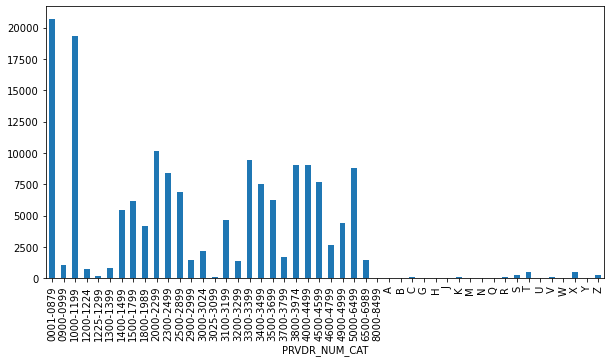

In [21]:
data_outpatient_claims_2[["DESYNPUF_ID", "PRVDR_NUM_CAT"]].drop_duplicates().groupby(["PRVDR_NUM_CAT"])["DESYNPUF_ID"].size().plot(kind='bar', figsize=(10,5))

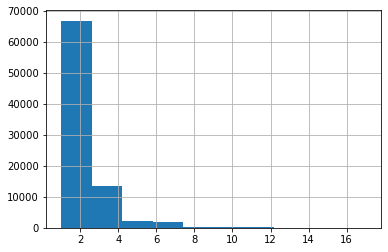

In [22]:
data_outpatient_claims_2[["DESYNPUF_ID", "PRVDR_NUM_CAT"]].drop_duplicates().groupby(["DESYNPUF_ID"])["PRVDR_NUM_CAT"].size().sort_values(ascending=False).hist()

In [23]:
data_outpatient_claims_2[["DESYNPUF_ID", "PRVDR_NUM_CAT"]].drop_duplicates().groupby(["DESYNPUF_ID"])["PRVDR_NUM_CAT"].size()

DESYNPUF_ID
00000B48BCF4AD29    4
0000525AB30E4DEF    4
00009C897C3D8372    3
0002EC0BCA99CACF    2
0002FABBFD6D1C5C    1
                   ..
FFFC54BCEB2A0631    3
FFFCF02B3CE4D724    3
FFFE94CBE61C0479    2
FFFF0FD89207928D    1
FFFF52C0C450A585    2
Name: PRVDR_NUM_CAT, Length: 85295, dtype: int64

<h2> Creating list of columns for diagnosis, procedure & hcpcs code </h2> 

In [24]:
diagnosis_code = [col for col in data_outpatient_claims_2.columns if "ICD9_DGNS" in col]
icd_procedural_code = [col for col in data_outpatient_claims_2.columns if "ICD9_PRCDR" in col]
icd_hcpcs_code = [col for col in data_outpatient_claims_2.columns if "HCPCS_CD" in col]

In [25]:
data_outpatient_claims_2[diagnosis_code]

,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2
0,2721,V1250
1,72999,72981
2,7216,NaN
3,99671,4019
4,7916,V7644
...,...,...
792557,71524,72887
792558,2307,1977
792559,71602,2722
792560,72819,4019


# Categorizing ICD9 Diagnosis Code

In [26]:
response = requests.get(config[2]["ICD9_DIAGNOSIS_CODE_CATEGORY_URL"], verify=False)

icd_code_categories = pd.read_html(response.text)[0]
icd_code_categories.head()

c:\MachineLearning\DataScience\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'icd.codes'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


,Chapter,Code Range,Description
0,1,001-139,Infectious And Parasitic Diseases
1,2,140-239,Neoplasms
2,3,240-279,"Endocrine, Nutritional And Metabolic Diseases,..."
3,4,280-289,Diseases Of The Blood And Blood-Forming Organs
4,5,290-319,Mental Disorders


In [27]:
for col in diagnosis_code:
    data_outpatient_claims_2[col] = data_outpatient_claims_2[col].str[ : 3]
    data_outpatient_claims_2[col].astype(str).replace('nan',np.nan)

0         272
1         729
2         721
3         996
4         791
         ... 
792557    715
792558    230
792559    716
792560    728
792561    795
Name: ICD9_DGNS_CD_1, Length: 792562, dtype: object

0         V12
1         729
2         NaN
3         401
4         V76
         ... 
792557    728
792558    197
792559    272
792560    401
792561    NaN
Name: ICD9_DGNS_CD_2, Length: 792562, dtype: object

In [28]:
icd_diagnosis_code_bin = [x for x in icd_code_categories['Code Range'].str.split("-")]
icd_diagnosis_code_categories = icd_code_categories['Code Range'].tolist()

In [29]:
def categorize_diagnosis_code (icd_diagnosis_code):
    if pd.isnull(icd_diagnosis_code) :
        return np.nan
    elif "E" in str(icd_diagnosis_code):
        return "E000-E999"
    elif "V" in str(icd_diagnosis_code):
        return "V01-V91"
    elif "OTH" in str(icd_diagnosis_code):
        return "OTHER"
    else:
        for lower, upper in icd_diagnosis_code_bin[ : -2]:
            if all([icd_diagnosis_code.isnumeric(), lower.isnumeric(), upper.isnumeric()]) & (lower <= icd_diagnosis_code <= upper):
                return f'{lower}-{upper}'

In [30]:
diagnosis_code_df = pd.DataFrame()

for col in diagnosis_code:
    diagnosis_code_df = pd.concat([diagnosis_code_df, pd.DataFrame(data_outpatient_claims_2[col].values)], axis=0)

In [31]:
unique_diagnosis_code = pd.DataFrame(diagnosis_code_df[0].unique(), columns=['Diagnosis_code'])

In [32]:
unique_diagnosis_code["Diagnosis_code_CAT"] = unique_diagnosis_code["Diagnosis_code"].apply(categorize_diagnosis_code)

In [33]:
for cols in diagnosis_code:
    data_outpatient_claims_2[f'{cols}_CAT'] = pd.merge(left=data_outpatient_claims_2, right=unique_diagnosis_code, left_on=cols, right_on="Diagnosis_code", how='left')['Diagnosis_code_CAT']

In [34]:
data_outpatient_claims_2[diagnosis_code + ["ICD9_DGNS_CD_1_CAT", "ICD9_DGNS_CD_2_CAT"]]

,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_1_CAT,ICD9_DGNS_CD_2_CAT
0,272,V12,240-279,V01-V91
1,729,729,710-739,710-739
2,721,NaN,710-739,NaN
3,996,401,800-999,390-459
4,791,V76,780-799,V01-V91
...,...,...,...,...
792557,715,728,710-739,710-739
792558,230,197,140-239,140-239
792559,716,272,710-739,240-279
792560,728,401,710-739,390-459


In [35]:
data_outpatient_claims_2[diagnosis_code[0]].isna().sum()
data_outpatient_claims_2[diagnosis_code[1]].isna().sum()
data_outpatient_claims_2["ICD9_DGNS_CD_1_CAT"].isna().sum()
data_outpatient_claims_2["ICD9_DGNS_CD_2_CAT"].isna().sum()

5604

298991

5604

298991

# Categorizing HCPCS Code

In [36]:
data_outpatient_claims_2[icd_hcpcs_code]

,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3
0,G0103,80076,80053
1,93971,NaN,NaN
2,97110,97001,97010
3,NaN,84484,V2632
4,36415,86800,85027
...,...,...,...
792557,G0283,84100,82607
792558,NaN,NaN,83874
792559,36415,84439,80053
792560,NaN,96374,J3488


In [37]:
hcpcs_code_category = pd.read_csv(config[1]['hcpcs_code_category_file'], encoding='cp1252')

In [38]:
hcpcs_code_category["Code Range"].tolist()

['00100-00222',
 '00300-00352',
 '00400-00474',
 '00500-00580',
 '00600-00670',
 '00700-00797',
 '00800-00882',
 '00902-00952',
 '01112-01173',
 '01200-01274',
 '01320-01444',
 '01462-01522',
 '01610-01680',
 '01710-01782',
 '01810-01860',
 '01916-01936',
 '01951-01953',
 '01958-01969',
 '01990-01999',
 '10004-10021',
 '10030-19499',
 '20100-29999',
 '30000-32999',
 '33016-37799',
 '38100-38999',
 '39000-39599',
 '40490-49999',
 '50010-53899',
 '54000-55899',
 '55920-55920',
 '55970-55980',
 '56405-58999',
 '59000-59899',
 '60000-60699',
 '61000-64999',
 '65091-68899',
 '69000-69979',
 '69990-69990',
 '70010-76499',
 '76506-76999',
 '77001-77022',
 '77046-77067',
 '77071-77086',
 '77261-77799',
 '78012-79999',
 '80047-80081',
 '80102-80102',
 '80145-80377',
 '80305-80377',
 '80400-80439',
 '80500-80502',
 '81000-81099',
 '81105-81408',
 '81410-81479',
 '81490-81599',
 '82009-84999',
 '85002-85999',
 '86000-86849',
 '86850-86999',
 '87003-87999',
 '88000-88099',
 '88104-88199',
 '88230-

In [39]:
hcpcs_code_category_numeric = [x for x in hcpcs_code_category['Code Range'].str.split("-") if x[0].isnumeric()]
hcpcs_code_category_alnum = [x for x in hcpcs_code_category['Code Range'].str.split("-") if x not in hcpcs_code_category_numeric]

In [40]:
replacement_dict = {"90772" : "96372", "78006" : "78014", "78007" : "78014", "78010" : "78013", "78011" : "78013", 
                    "80100" : "G0431", "80101" : "G0431", "80104" : "G0434", "78000" : "78012", "78001" : "78012", 
                    "78003" : "78012", "78010" : "78013", "78011" : "78013", "78006" : "78014", "78007" : "78014",
                    "10022" : "10004", "96101" : "96130", "96102" : "96138", "82003" : "80329", "80100" : "G0430",
                    "80101" : "G0431", "82003" : "G6039", "77031" : "19081", "77032" : "19082", "99144" : "99152",
                    "93875" : "93880", "90921" : "G0308", "99143" : "99151", "99143" : "99151", "99144" : "99152",
                    "99145" : "99153", "99148" : "99155", "99149" : "99156", "99150" : "99157", "0187T" : "92132", 
                    "0030T" : "86849"}

> HCPCS Code Corrections
     - Certain codes are no longer in use and have been replaced with another HCPCS code.
     - Creating a dictionary which contains all the old codes as keys and new codes as their values

In [41]:
data_outpatient_claims_2.replace(replacement_dict, inplace=True)

In [42]:
hcpcs_code_df = pd.DataFrame()

for col in icd_hcpcs_code:
    hcpcs_code_df = pd.concat([hcpcs_code_df, pd.DataFrame(data_outpatient_claims_2[col].values)], axis=0)

In [43]:
hcpcs_code_df

,0
0,G0103
1,93971
2,97110
3,NaN
4,36415
...,...
792557,82607
792558,83874
792559,80053
792560,J3488


In [44]:
unique_hcpcs_code = pd.DataFrame(hcpcs_code_df[0].unique(), columns=['HCPCS_code'])

In [45]:
unique_hcpcs_code

,HCPCS_code
0,G0103
1,93971
2,97110
3,NaN
4,36415
...,...
4336,A4362
4337,A4334
4338,00529
4339,96370


In [46]:
hcpcs_code_category_numeric
hcpcs_code_category_alnum

[['00100', '00222'],
 ['00300', '00352'],
 ['00400', '00474'],
 ['00500', '00580'],
 ['00600', '00670'],
 ['00700', '00797'],
 ['00800', '00882'],
 ['00902', '00952'],
 ['01112', '01173'],
 ['01200', '01274'],
 ['01320', '01444'],
 ['01462', '01522'],
 ['01610', '01680'],
 ['01710', '01782'],
 ['01810', '01860'],
 ['01916', '01936'],
 ['01951', '01953'],
 ['01958', '01969'],
 ['01990', '01999'],
 ['10004', '10021'],
 ['10030', '19499'],
 ['20100', '29999'],
 ['30000', '32999'],
 ['33016', '37799'],
 ['38100', '38999'],
 ['39000', '39599'],
 ['40490', '49999'],
 ['50010', '53899'],
 ['54000', '55899'],
 ['55920', '55920'],
 ['55970', '55980'],
 ['56405', '58999'],
 ['59000', '59899'],
 ['60000', '60699'],
 ['61000', '64999'],
 ['65091', '68899'],
 ['69000', '69979'],
 ['69990', '69990'],
 ['70010', '76499'],
 ['76506', '76999'],
 ['77001', '77022'],
 ['77046', '77067'],
 ['77071', '77086'],
 ['77261', '77799'],
 ['78012', '79999'],
 ['80047', '80081'],
 ['80102', '80102'],
 ['80145', '8

[['0001F', '0015F'],
 ['0500F', '0584F'],
 ['1000F', '1505F'],
 ['2000F', '2060F'],
 ['3006F', '3776F'],
 ['4000F', '4563F'],
 ['5005F', '5250F'],
 ['6005F', '6150F'],
 ['7010F', '7025F'],
 ['9001F', '9007F'],
 ['0002M', '0016M'],
 ['0042T', '0184T'],
 ['0191T', '0232T'],
 ['0234T', '0317T'],
 ['0329T', '0358T'],
 ['0362T', '0373T'],
 ['0376T', '0386T'],
 ['0394T', '0423T'],
 ['0424T', '0468T'],
 ['0469T', '0478T'],
 ['0479T', '0480T'],
 ['0609T', '0612T'],
 ['0613T', '0614T'],
 ['0615T', '0618T'],
 ['0619T', '0619T'],
 ['0604T', '0606T'],
 ['0609T', '0612T'],
 ['0613T', '0614T'],
 ['0615T', '0618T'],
 ['0619T', '0619T'],
 ['0001U', '0226U']]

In [47]:
def categorize_hcpcs_code_2(modifier, hcpcs_code):
    categories = [[x[0][:-1], x[1][:-1]] for x in hcpcs_code_category_alnum if modifier in x[0]]
    for lower, upper in categories:
        if lower <= hcpcs_code <= upper:
            return f'{lower}{modifier}-{upper}{modifier}'

In [48]:
categorize_hcpcs_code_2("F", "4005")

'4000F-4563F'

In [49]:
def categorize_hcpcs_code (hcpcs_code):
    if pd.isnull(hcpcs_code) :
        return np.nan
    elif str(hcpcs_code)[0].isalpha():
        return str(hcpcs_code)[0]
    elif str(hcpcs_code)[-1].isalpha():
        return categorize_hcpcs_code_2(str(hcpcs_code)[-1], str(hcpcs_code)[:-1])
    elif str(hcpcs_code)[0].isnumeric():
        for lower, upper in hcpcs_code_category_numeric:
            if lower <= hcpcs_code <= upper:
                return f'{lower}-{upper}'

In [50]:
unique_hcpcs_code['HCPCS_code_CAT'] = unique_hcpcs_code['HCPCS_code'].apply(categorize_hcpcs_code)

In [51]:
# unique_hcpcs_code.drop(columns=["HCPCS_code_CAT"], inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    unique_hcpcs_code[(unique_hcpcs_code['HCPCS_code'].notna()) & (unique_hcpcs_code['HCPCS_code_CAT'].isna())]

,HCPCS_code,HCPCS_code_CAT
131,01,None
1166,99910,None
1267,0521,None
2120,02,None
2433,00002,None
2881,0851,None
2999,99998,None


In [52]:
unique_hcpcs_code.isna().sum()

HCPCS_code        1
HCPCS_code_CAT    8
dtype: int64

In [53]:
unique_hcpcs_code['HCPCS_code_CAT'].fillna("UNKNOWN", inplace=True)

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    unique_hcpcs_code[(unique_hcpcs_code['HCPCS_code'].notna()) & (unique_hcpcs_code['HCPCS_code_CAT'].isna())]

,HCPCS_code,HCPCS_code_CAT


In [55]:
response = requests.get(config[2]["HCPCS_CATEGORY_URL"], verify=False)

hcpcs_code_category_2 = pd.read_html(response.text)[0]

hcpcs_code_category_2['HCPCS Index'] = hcpcs_code_category_2['HCPCS Codes'].str[1:2]

c:\MachineLearning\DataScience\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hcpcsdata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [56]:
hcpcs_code_category_2

,HCPCS Codes,Count,Description,HCPCS Index
0,'A' Codes,678,"Transportation Services Including Ambulance, M...",A
1,'B' Codes,50,Enteral And Parenteral Therapy,B
2,'C' Codes,376,Temporary Codes For Use with Outpatient Prospe...,C
3,'E' Codes,608,Durable Medical Equipment,E
4,'G' Codes,1740,Procedures / Professional Services (Temporary ...,G
5,'H' Codes,88,Alcohol and Drug Abuse Treatment Services / Re...,H
6,'J' Codes,832,"Drugs Administered Other Than Oral Method, Che...",J
7,'K' Codes,150,Durable Medical Equipment For Medicare Adminis...,K
8,'L' Codes,904,"Orthotic And Prosthetic Procedures, Devices",L
9,'M' Codes,117,Medical Services,M


In [57]:
hcpcs_code_category_2.columns
unique_hcpcs_code.columns
hcpcs_code_category.columns

Index(['HCPCS Codes', 'Count', 'Description', 'HCPCS Index'], dtype='object')

Index(['HCPCS_code', 'HCPCS_code_CAT'], dtype='object')

Index(['Code Range', 'Description'], dtype='object')

In [58]:
unique_hcpcs_code = unique_hcpcs_code.merge(hcpcs_code_category, left_on='HCPCS_code_CAT', right_on="Code Range", how='left').merge(hcpcs_code_category_2,left_on='HCPCS_code_CAT', right_on="HCPCS Index", how='left')

In [59]:
unique_hcpcs_code['Description'] = unique_hcpcs_code['Description_x'].fillna("") + unique_hcpcs_code['Description_y'].fillna("")

In [60]:
unique_hcpcs_code["Category"] = unique_hcpcs_code["Code Range"].fillna("") + unique_hcpcs_code["HCPCS Codes"].fillna("")

In [61]:
unique_hcpcs_code.loc[(unique_hcpcs_code["HCPCS_code_CAT"]=="UNKNOWN"), "Description"] = "UNKNOWN"
unique_hcpcs_code.loc[(unique_hcpcs_code["HCPCS_code_CAT"]=="UNKNOWN"), "Category"] = "UNKNOWN"

In [62]:
unique_hcpcs_code = unique_hcpcs_code.loc[ : , ["HCPCS_code", "Description", "Category"]]

unique_hcpcs_code.loc[(unique_hcpcs_code['HCPCS_code'].isna()), ["Description", "Category"]] = [np.nan, np.nan]

In [63]:
unique_hcpcs_code.columns

Index(['HCPCS_code', 'Description', 'Category'], dtype='object')

In [64]:
for cols in icd_hcpcs_code:
    data_outpatient_claims_2[f'{cols}_CAT'] = pd.merge(left=data_outpatient_claims_2, right=unique_hcpcs_code, left_on=cols, right_on="HCPCS_code", how='left')['Category']

In [65]:
for cols in icd_hcpcs_code:
    data_outpatient_claims_2[f'{cols}_CAT_DESC'] = pd.merge(left=data_outpatient_claims_2, right=unique_hcpcs_code, left_on=cols, right_on="HCPCS_code", how='left')['Description']

In [66]:
data_outpatient_claims_2[[col for col in data_outpatient_claims_2 if "HCPCS" in col]]

,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_1_CAT,HCPCS_CD_2_CAT,HCPCS_CD_3_CAT,HCPCS_CD_1_CAT_DESC,HCPCS_CD_2_CAT_DESC,HCPCS_CD_3_CAT_DESC
0,G0103,80076,80053,'G' Codes,80047-80081,80047-80081,Procedures / Professional Services (Temporary ...,Organ or Disease Oriented Panels,Organ or Disease Oriented Panels
1,93971,NaN,NaN,93880-93998,NaN,NaN,Non-Invasive Vascular Diagnostic Studies,NaN,NaN
2,97110,97001,97010,97110-97150,97001-97002,97010-97028,Physical Medicine and Rehabilitation Therapeut...,Physical Therapy Evaluation,Supervised Physical Medicine and Rehabilitatio...
3,NaN,84484,V2632,NaN,82009-84999,'V' Codes,NaN,Chemistry Procedures,"Vision, Hearing And Speech-Language Pathology ..."
4,36415,86800,85027,33016-37799,86000-86849,85002-85999,Surgical Procedures on the Cardiovascular System,Immunology Procedures,Hematology and Coagulation Procedures
...,...,...,...,...,...,...,...,...,...
792557,G0283,84100,82607,'G' Codes,82009-84999,82009-84999,Procedures / Professional Services (Temporary ...,Chemistry Procedures,Chemistry Procedures
792558,NaN,NaN,83874,NaN,NaN,82009-84999,NaN,NaN,Chemistry Procedures
792559,36415,84439,80053,33016-37799,82009-84999,80047-80081,Surgical Procedures on the Cardiovascular System,Chemistry Procedures,Organ or Disease Oriented Panels
792560,NaN,96374,J3488,NaN,96360-96549,'J' Codes,NaN,"Hydration, Therapeutic, Prophylactic, Diagnost...","Drugs Administered Other Than Oral Method, Che..."


In [67]:
data_outpatient_claims_2.to_sql("Outpatient_claims_2", index=False, con=conn_object, if_exists="replace")

In [68]:
conn_object.close()